In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from ultralytics import YOLO

In [3]:
model = YOLO("yolov8n.pt")

In [ ]:
model

In [4]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [ ]:
results = model(img)
results

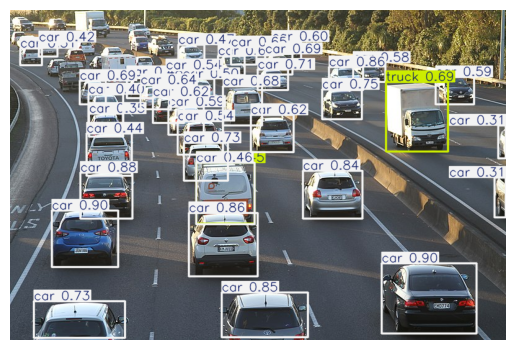

In [6]:
rendered_img = results[0].plot()

plt.imshow(rendered_img[..., ::-1])
plt.axis("off")
plt.show()

In [ ]:
results[0].orig_img

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)
    
    annotated_frame = results[0].plot()
    cv2.imshow('Drowsiness detection', annotated_frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Train from scratch

In [1]:
import uuid # to create a unique identifier
import os
import time

In [12]:
IMAGES_PATH = os.path.join('../data/raw', 'test')  #data/raw/test
labels = ['awake', 'drowsy']
number_imgs = 20

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        ret, frame = cap.read()

        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
       
        # Writes out image to file
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)
        time.sleep(2)   #2s delay between captions

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=../dataset.yaml epochs=100 imgsz=640

In [7]:
model = YOLO("../runs/detect/train2/weights/best.pt")

In [ ]:
results = model("../data/raw/test/images/drowsy.13b9ca50-5b2f-11f0-95ae-8af010ddec9a.jpg", show=True)

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)
    
    annotated_frame = results[0].plot()
    cv2.imshow('Drowsiness detection', annotated_frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()